SEEM2460 – Introduction to Data Science

Lee Tsz Kin (SC/CSCI/2) (1155112410)

Prof. Helen Meng

Project Report


# Objective
Construct models to predict Hong Kong’s daily confirmed case next day and after using data from this day or older.

# Introduction
The Wuhan Coronavirus illness (SARS-Cov-2) becomes as a global threat. The aim of this study is first to find the best prediction models for daily confirmed cases and second to predict confirmed cases with these models in order to have more readiness in healthcare systems.

Through predicting the Daily Confirmed Case, we may find out some factors driving the daily case growth (and spotting difference between different countries).

# Methods
This study will be conducted based on daily confirmed cases of Wuhan Coronavirus illness which are collected from Johns Hopkins University from Jan 22<sup>nd</sup> 2020, daily city mobility which are collected from Citymapper from Jan 22<sup>nd</sup> 2020 (and other related data collected from other sources). And predict using regression models including but not limited to Ordinary Least Square (OLS), Ridge and Least Absolute Shrinkage and Selection Operator (Lasso) , time series model including but not limited to Autoregressive Integrated Moving Average (ARIMA) and other possible methods.

# Data
The project used the following data:

1. Novel Coronavirus (COVID-19) Cases, provided by JHU CSSE <https://github.com/CSSEGISandData/COVID-19>

2. Citymapper Mobility Index, provided by Citymapper <https://citymapper.com/cmi>

## Preparing the Data

In [25]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn.linear_model as OLS
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Citymapper Mobility Index

In [26]:
cmi = pd.read_csv('./Citymapper_Mobility_Index_20200522.csv',skiprows=3,index_col=0)

In [27]:
cmi_hk = cmi[["Hong Kong"]]
cmi_hk.columns = ["City Mobility"]
cmi_hk.index=(pd.date_range(start=pd.datetime(2020, 1, 20), periods=123, freq='D'))

In [28]:
cmi_hk

,City Mobility
2020-01-20,1.07
2020-01-21,1.04
2020-01-22,1.03
2020-01-23,0.93
2020-01-24,0.73
...,...
2020-05-17,0.53
2020-05-18,0.49
2020-05-19,0.54
2020-05-20,0.54


### COVID-19 time_series data

In [29]:
covid = pd.read_csv('./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',skiprows=3,header=None,index_col=[0,1]).transpose()

In [30]:
covid_hk = covid[[("Hong Kong","China")]][2:]
covid_hk.columns = ["Confirmed Case"]
covid_hk.index=(pd.date_range(start=pd.datetime(2020, 1, 22), periods=121, freq='D'))

In [31]:
covid_hk

,Confirmed Case
2020-01-22,0.0
2020-01-23,2.0
2020-01-24,2.0
2020-01-25,5.0
2020-01-26,8.0
...,...
2020-05-17,1055.0
2020-05-18,1055.0
2020-05-19,1055.0
2020-05-20,1055.0


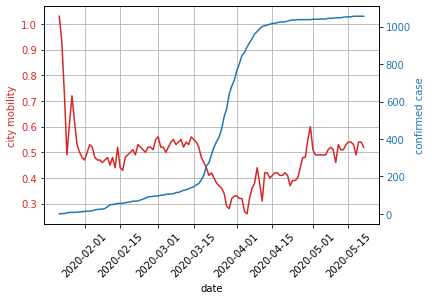

In [32]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('city mobility', color=color)
ax1.plot(cmi_hk["2020-01-22":], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(cmi_hk["2020-01-22":].index, rotation=45)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('confirmed case', color=color)
ax2.plot(covid_hk, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

plt.savefig('cmi_confirmed_case.png', bbox_inches = 'tight')
plt.show()

From this graph, we can identify that there may have some relationship betwwen the city mobility and confirmed cases.
The case number growth rapidly while the mobility drops.

### Coverting to daily difference

In [33]:
covid_hk.diff()

,Confirmed Case
2020-01-22,NaN
2020-01-23,2.0
2020-01-24,0.0
2020-01-25,3.0
2020-01-26,3.0
...,...
2020-05-17,3.0
2020-05-18,0.0
2020-05-19,0.0
2020-05-20,0.0


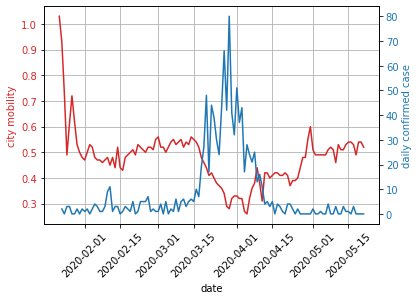

In [34]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('city mobility', color=color)
ax1.plot(cmi_hk["2020-01-22":], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(cmi_hk["2020-01-22":].index, rotation=45)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('daily confirmed case', color=color)
ax2.plot(covid_hk.diff(), color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax1.grid(True)
plt.savefig('cmi_daily_confirmed_case.png', bbox_inches = 'tight')
plt.show()

When we put city mobility and daily confirmed case together, we can see that, when the daily confirmed case increase, the city mobility drops.

However, we actually cannot get any full conclusion from the data, as we cannot observe many relationship with the incubation period.

If there is relationship with the daily confirmed case and the incubation period, we should see changes in city mobility before the daily confirmed case growth.

However, when the city mobilty drops, ther daily confirmed case drops thereafter. So the city mobility may be one of the factor affecting the number of the confirmed case. 

There may be other factor affecting the case number, like daily arrival in different port/from different country etc.

However, we will still put in to predicting the confirmed cases with the city mobility, to see if there is actually any relatioship betwwen the two data.

# Prediction using Regression models
## Prediction using OLS

### What is OLS?

**O**rdinary **L**east **S**quare

- A type of linear least squares method for estimating the unknown parameters in a linear regression model.

- Used in fields as diverse as economics (econometrics), data science, political science, psychology and engineering (control theory and signal processing)
 

### Fitting the data

In [35]:
results = sm.OLS(np.asarray(covid_hk.diff()["2020-01-23":],dtype = 'float'),sm.add_constant(np.asarray(cmi_hk["2020-01-23":],dtype = 'float'))).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     64.20
Date:                Sun, 24 May 2020   Prob (F-statistic):           9.00e-13
Time:                        11:25:28   Log-Likelihood:                -468.15
No. Observations:                 120   AIC:                             940.3
Df Residuals:                     118   BIC:                             945.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.0381      5.754      9.392      0.000      42.644      65.432
x1           -95.4398     11.912     -8.012      0.000    -119.028     -71.851
==============================================================================
Omnibus:                       59.093   Durbin-Watson:                   0.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.130
Skew:                           1.906   Prob(JB):                     6.91e-38
Kurtosis:                       7.438   Cond. No.                         13.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

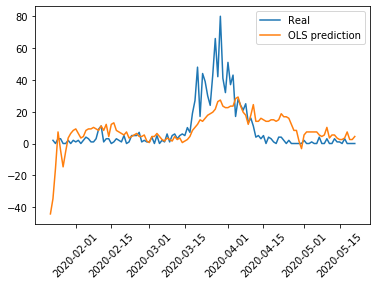

In [36]:
OLS_predict = pd.DataFrame(results.predict(sm.add_constant(np.asarray(cmi_hk["2020-01-22":],dtype = 'float'))))
OLS_predict.index = (pd.date_range(start=pd.datetime(2020, 1, 22), periods=121, freq='D'))
plt.plot(covid_hk.diff())
plt.plot(OLS_predict)
plt.legend(["Real","OLS prediction"])
plt.xticks(rotation=45)
plt.draw()

## Prediction using Ridge

### What is Ridge?
Technique for analyzing multiple regression data that suffer from multicollinearity

- Ridge regression avoids overfitting problem on Least square regression. It works in part because it doesn’t require unbiased estimators.

- Least squares produces unbiased estimates, variances can be so large that they may be wholly inaccurate.

- Ridge regression adds just enough bias to make the estimates reasonably reliable approximations to true population values.

### Fitting the data

In [37]:
from sklearn.linear_model import Ridge
results = Ridge(alpha=0.0001)
results.fit(cmi_hk["2020-01-23":].astype(float),covid_hk.diff()["2020-01-23":].astype(float))
results.score(cmi_hk["2020-01-23":].astype(float),covid_hk.diff()["2020-01-23":].astype(float))

0.35234782804733844

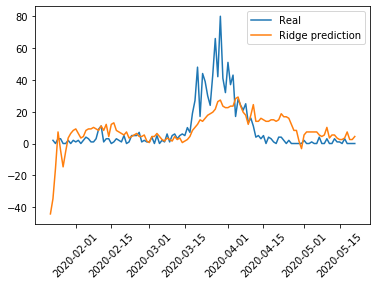

In [38]:
Ridge_predict = pd.DataFrame(results.predict(cmi_hk["2020-01-22":].astype(float)))
Ridge_predict.index = (pd.date_range(start=pd.datetime(2020, 1, 22), periods=121, freq='D'))
plt.plot(covid_hk.diff())
plt.plot(Ridge_predict)
plt.legend(["Real","Ridge prediction"])
plt.xticks(rotation=45)
plt.draw()

## Prediction using Lasso

### What is Lasso?
**L**east **A**bsolute **S**hrinkage and **S**election **O**perator

- Performs both variable selection and regularization to enhance the prediction accuracy and interpretability of the statistical model it produces.

- The only difference from Ridge regression is that the regularization term is in absolute value.

### Fitting the data

In [39]:
from sklearn.linear_model import Lasso
results = Lasso(alpha=0.001)
results.fit(cmi_hk["2020-01-23":].astype(float),covid_hk.diff()["2020-01-23":].astype(float))
results.score(cmi_hk["2020-01-23":].astype(float),covid_hk.diff()["2020-01-23":].astype(float))


0.3523473029573695

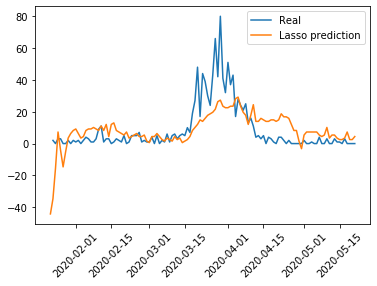

In [40]:
Lasso_predict = pd.DataFrame(results.predict(cmi_hk["2020-01-22":].astype(float)))
Lasso_predict.index = (pd.date_range(start=pd.datetime(2020, 1, 22), periods=121, freq='D'))
plt.plot(covid_hk.diff())
plt.plot(Lasso_predict)
plt.legend(["Real","Lasso prediction"])
plt.xticks(rotation=45)
plt.draw()

From the results of the three model, the model actually cannot fit very well to the data. This also support our conclusion in the previous part - More data is needed to predicting the confirmed cases.

# Prediction with time series models
## Prediction using ARIMA

### What is ARIMA?
**A**uto**R**egressive **I**ntegrated **M**oving **A**verage Model

- Fitted to time series data either to better understand the data or to predict future points in the series (forecasting)

- Has three compartment

    - Autoregression (AR)
    
    - Differencing (I)
    
    - Moving Average (MA)
    
- Best for data that is related to time

**Autoregressive component (AR):**

- Forecasts only using a combination of the past values sorta like linear regression

- The number of AR terms used is directly proportional to the number of previous periods taken into consideration for the forecasting.

Use AR terms in the model when the

- ACF plots show autocorrelation decaying towards zero

- PACF plot cuts off quickly towards zero

- ACF of a stationary series shows positive at lag-1

*Autocorrelation function plot (ACF)

*Partial Autocorrelation Function plots (PACF)

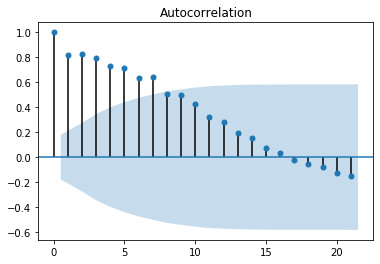

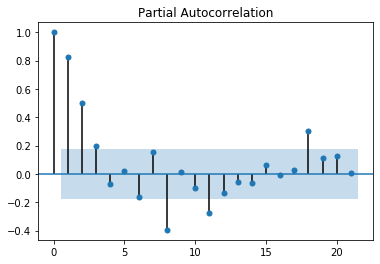

In [41]:
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

x = plot_acf(covid_hk.diff()["2020-01-23":].astype(float))
y = plot_pacf(covid_hk.diff()["2020-01-23":].astype(float))

From here we can see that how our data (daily confirmed case) perfrom in ACF and PACF plot.

The ACF plots show autocorrelation decaying towards zero and the PACF plots cuts off quickly towards zero

So we will use AR in our model.

**Moving Averages (MA):**

- Random jumps in the time series plot whose effect is felt in two or more consecutive periods.

- represent the error calculated in our ARIMA model and represent what the MA component would lag for.

- A purely MA model would smooth out these sudden jumps like the exponential smoothing method.

**Integrated component(I):**

This component comes into action when the time series is not stationary. The number of times we have to difference the series to make it stationary is the parameter(i-term) for the integrated component.

We can represent our model as ARIMA(ar-term, ma-term, i-term)

Auto Regressive (AR only) model:
    
$$ Y_t = \alpha + \beta_1Y_{t-1} + \beta_2Y_{t-2} + .. + \beta_pY_{t-p} + \epsilon_1  $$

Moving Average (MA only) model:

$$ Y_t = \alpha + \epsilon_t + \phi_1\epsilon_{t-1} + \phi_2\epsilon_{t-2} + .. + \phi_q\epsilon_{t-q} $$

### Predicting

In [42]:
from statsmodels.tsa.arima_model import ARIMA

In [43]:
results = ARIMA(covid_hk.diff()["2020-01-23":].astype(float),order=(15,1,2)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.Confirmed Case   No. Observations:                  119
Model:                ARIMA(15, 1, 2)   Log Likelihood                -392.410
Method:                       css-mle   S.D. of innovations              6.478
Date:                Sun, 24 May 2020   AIC                            822.821
Time:                        11:25:49   BIC                            875.624
Sample:                    01-24-2020   HQIC                           844.262
                         - 05-21-2020                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0223      0.285     -0.078      0.938      -0.580       0.535
ar.L1.D.Confirmed Case     -0.7067      0.193     -3.669      0.000      -1.084      -0.329
ar.L2.D.Confirmed Case      0.4728      0.237      1.992      0.049       0.008       0.938
ar.L3.D.Confirmed Case      0.3757      0.155      2.420      0.017       0.071       0.680
ar.L4.D.Confirmed Case      0.1233      0.123      1.005      0.317      -0.117       0.364
ar.L5.D.Confirmed Case      0.0892      0.121      0.740      0.461      -0.147       0.326
ar.L6.D.Confirmed Case      0.0678      0.120      0.565      0.574      -0.167       0.303
ar.L7.D.Confirmed Case      0.2536      0.120      2.105      0.038       0.017       0.490
ar.L8.D.Confirmed Case      0.0626      0.132      0.473      0.637      -0.196       0.322
ar.L9.D.Confirmed Case     -0.0817      0.126     -0.648      0.518      -0.329       0.165
ar.L10.D.Confirmed Case     0.1981      0.118      1.678      0.096      -0.033       0.429
ar.L11.D.Confirmed Case    -0.0673      0.123     -0.546      0.586      -0.309       0.174
ar.L12.D.Confirmed Case    -0.2015      0.120     -1.686      0.095      -0.436       0.033
ar.L13.D.Confirmed Case    -0.1165      0.120     -0.974      0.332      -0.351       0.118
ar.L14.D.Confirmed Case    -0.1326      0.127     -1.047      0.298      -0.381       0.116
ar.L15.D.Confirmed Case    -0.1092      0.097     -1.121      0.265      -0.300       0.082
ma.L1.D.Confirmed Case      0.1367      0.178      0.766      0.446      -0.213       0.486
ma.L2.D.Confirmed Case     -0.7878      0.176     -4.466      0.000      -1.134      -0.442
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0211           -0.0000j            1.0211           -0.5000
AR.2            -1.0020           -0.5095j            1.1241           -0.4251
AR.3            -1.0020           +0.5095j            1.1241            0.4251
AR.4            -1.1184           -0.5640j            1.2525           -0.4257
AR.5            -1.1184           +0.5640j            1.2525            0.4257
AR.6            -0.4075           -1.0096j            1.0888           -0.3111
AR.7            -0.4075           +1.0096j            1.0888            0.3111
AR.8             1.0327           -0.1535j            1.0440           -0.0235
AR.9             1.0327           +0.1535j            1.0440            0.0235
AR.10            0.8516           -0.7249j            1.1184           -0.1122
AR.11            0.8516           +0.7249j            1.1184            0.1122
AR.12            0.4696           -1.1240j            1.2182           -0.1870
AR.13            0.4696           +1.1240j   

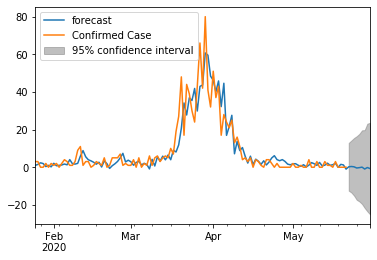

In [44]:
x = results.plot_predict("2020-01-25","2020-05-30",dynamic=False)

From here we can know that ARIMA gives a quite accurate result while forcasting the result with from day before.

# Prediction for other country

Now we know that using ARIMA can give a quite accurate result in estimating daily confirmed case. So now we will try to predict the daily trand for courtries other than Hong Kong.

## Spain

In [45]:
covid_spain = covid[[(None,"Spain")]][2:]
covid_spain.index=(pd.date_range(start=pd.datetime(2020, 1, 22), periods=121, freq='D'))
covid_spain.columns = ["Confirmed Case"]
covid_spain


,Confirmed Case
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2020-05-17,230698.0
2020-05-18,231606.0
2020-05-19,232037.0
2020-05-20,232555.0


In [46]:
covid_spain.diff()

,Confirmed Case
2020-01-22,NaN
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2020-05-17,0.0
2020-05-18,908.0
2020-05-19,431.0
2020-05-20,518.0


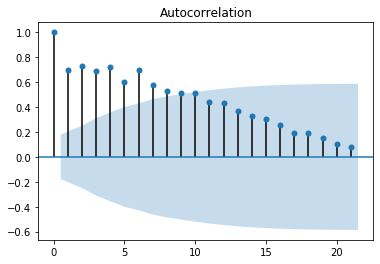

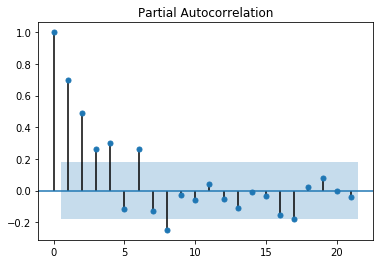

In [47]:
x = plot_acf(covid_spain.diff()["2020-01-23":].astype(float))
y = plot_pacf(covid_spain.diff()["2020-01-23":].astype(float))

In [67]:
results = ARIMA(covid_spain.diff()["2020-01-23":].astype(float),order=(3,1,1)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.Confirmed Case   No. Observations:                  119
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -1051.080
Method:                       css-mle   S.D. of innovations           1651.833
Date:                Sun, 24 May 2020   AIC                           2114.160
Time:                        11:39:04   BIC                           2130.835
Sample:                    01-24-2020   HQIC                          2120.931
                         - 05-21-2020                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.5787     66.419      0.069      0.945    -125.600     134.758
ar.L1.D.Confirmed Case    -1.2855      0.146     -8.803      0.000      -1.572      -0.999
ar.L2.D.Confirmed Case    -0.8434      0.140     -6.033      0.000      -1.117      -0.569
ar.L3.D.Confirmed Case    -0.4305      0.081     -5.296      0.000      -0.590      -0.271
ma.L1.D.Confirmed Case     0.5501      0.148      3.724      0.000       0.261       0.840
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1331           -0.0000j            1.1331           -0.5000
AR.2           -0.4130           -1.3709j            1.4318           -0.2966
AR.3           -0.4130           +1.3709j            1.4318            0.2966
MA.1           -1.8177           +0.0000j            1.8177            0.5000
-----------------------------------------------------------------------------
"""

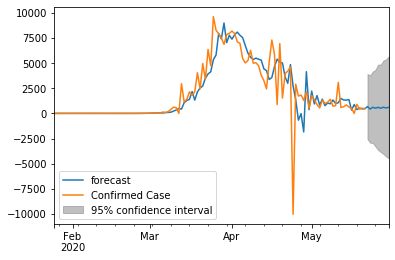

In [68]:
x = results.plot_predict("2020-01-25","2020-05-30",dynamic=False)

* There is an error in 22/4/2020 - 24/4/2020 in the data where the total number drop from 213024 to 202990, and then come back to 205905. So there is a drop of about 10000 in that day. And the prediction after it is unstable.

## France

In [61]:
covid_france = covid[[(None,"France")]][2:]
covid_france.index=(pd.date_range(start=pd.datetime(2020, 1, 22), periods=121, freq='D'))
covid_france.columns = ["Confirmed Case"]
covid_france

,Confirmed Case
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,2.0
2020-01-25,3.0
2020-01-26,3.0
...,...
2020-05-17,177240.0
2020-05-18,177554.0
2020-05-19,178428.0
2020-05-20,179069.0


In [64]:
covid_france.diff()

,Confirmed Case
2020-01-22,NaN
2020-01-23,0.0
2020-01-24,2.0
2020-01-25,1.0
2020-01-26,0.0
...,...
2020-05-17,33.0
2020-05-18,314.0
2020-05-19,874.0
2020-05-20,641.0


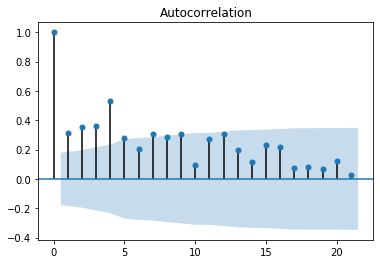

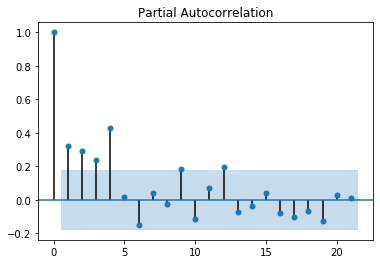

In [65]:
x = plot_acf(covid_france.diff()["2020-01-23":].astype(float))
y = plot_pacf(covid_france.diff()["2020-01-23":].astype(float))

In [69]:
results = ARIMA(covid_france.diff()["2020-01-23":].astype(float),order=(1,1,1)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.Confirmed Case   No. Observations:                  119
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1106.731
Method:                       css-mle   S.D. of innovations           2635.395
Date:                Sun, 24 May 2020   AIC                           2221.462
Time:                        11:39:37   BIC                           2232.578
Sample:                    01-24-2020   HQIC                          2225.976
                         - 05-21-2020                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.9232     52.965      0.074      0.941     -99.886     107.732
ar.L1.D.Confirmed Case    -0.1481      0.110     -1.351      0.179      -0.363       0.067
ma.L1.D.Confirmed Case    -0.7552      0.072    -10.472      0.000      -0.897      -0.614
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -6.7510           +0.0000j            6.7510            0.5000
MA.1            1.3242           +0.0000j            1.3242            0.0000
-----------------------------------------------------------------------------
"""

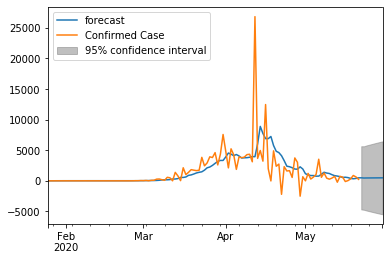

In [70]:
x = results.plot_predict("2020-01-25","2020-05-30",dynamic=False)

Through predicting the case number in Spain and France, we can know that there is still limitation in machine learning. A sudden increase and drop is hard to identified. 

If more data like daily arrival is provided and take into consideration while constructing the model. It can help to give a more reliable prediction.

# Conclusion
In this test, ARIMA have a good performance for predicting the daily confirmed case growth.
However, through testing for the european country, it cannot detect sudden change in the data (sudden drop in Spain, sudden rise in France).
But it is still reliable in normal circumstances and give insight of how the number goes.
Through the testing for Hong Kong, Spain and France, we can forsee that the disease trand is nearly come to an end in these countries.

Linear regression model not perfroming well due to the lack of data other than the city mobility.

With time series model like ARIMA, Government can get to know that the trand for the disease in Hong Kong and have more readiness in healthcare systems